In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode

%matplotlib inline  

In [2]:
def pixel_extractor(file_name):
    with open(file_name) as f:
        content = f.readlines()
    content_strip = [x.strip() for x in content]
    nod_name = content_strip[0]
    content_strip_points = content_strip[1:]
    points_pix = [x.split('\t' ) for x in content_strip_points]
    points_pix = np.array(points_pix)
    return points_pix, nod_name

In [3]:
def pixel_plotter(points_array):
    
    fig_1 = plt.figure(1)
    ax1 = fig_1.add_subplot(111)
    ax1.set_aspect('equal')
    plt.scatter(points_array[:,1],points_array[:,0])
    plt.savefig('nodule_points')
    
    int_points_x = [int(i) for i in points_array[:,0]]
    min_x = np.amin(int_points_x)
    int_points_x = int_points_x - min_x
    int_points_y = [int(i) for i in points_array[:,1]]
    min_y = np.amin(int_points_y)
    int_points_y = int_points_y - min_y
    matrix = np.zeros((np.amax(int_points_x)+1,np.amax(int_points_y)+1))
    int_points_x = int_points_x[:,None]
    int_points_y = int_points_y[:,None]
    new_points = np.hstack((int_points_x,int_points_y))
    i = 0
    for vals in new_points:
        x = vals[0]
        y = vals[1]
        matrix[x,y] = float(points_array[i][2])
        i+=1
        
    fig_2 = plt.figure(2)
    ax2 = fig_2.add_subplot(111)
    ax2.set_aspect('equal')
    plt.imshow(matrix,origin='lower', interpolation='none')
    plt.savefig('pixel_values')

In [4]:
def recist_calc(points_array):
    int_points_x = [int(i) for i in points_array[:,0]]
    min_x = np.amin(int_points_x)
    int_points_x = int_points_x - min_x
    int_points_y = [int(i) for i in points_array[:,1]]
    min_y = np.amin(int_points_y)
    int_points_y = int_points_y - min_y
    x_diff_array = int_points_x[:,None] - np.transpose(int_points_x[:,None])
    y_diff_array = int_points_y[:,None] - np.transpose(int_points_y[:,None])
    recist_diam = np.sqrt(x_diff_array**2+y_diff_array**2)
    max_diam = np.amax(recist_diam)
    recist_indx = np.unravel_index(np.argmax(recist_diam),recist_diam.shape)
    matrix = np.zeros((np.amax(int_points_x)+1,np.amax(int_points_y)+1))
    int_points_x = int_points_x[:,None]
    int_points_y = int_points_y[:,None]
    new_points = np.hstack((int_points_x,int_points_y))
    i = 0
    for vals in new_points:
        x = vals[0]
        y = vals[1]
        matrix[x,y] = 1.0
        i+=1
    xs = [int_points_x[recist_indx[0]][0],int_points_x[recist_indx[1]][0]]
    ys = [int_points_y[recist_indx[0]][0],int_points_y[recist_indx[1]][0]]
    plt.figure()
    plt.plot(ys,xs, color='red')
    plt.imshow(matrix,origin='lower', interpolation='none')
    plt.title('Recist Diameter: '+str(round(max_diam,2)))
    plt.savefig('recist_diameter')
    return max_diam

In [5]:
points_array_test, nod_name = pixel_extractor('Finished_Nodules/CA_3000514/1Slices/Pixels/3slice_pixels.txt')

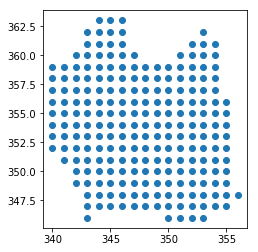

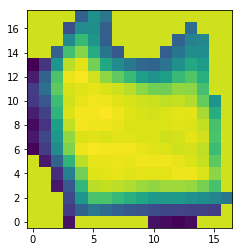

In [6]:
pixel_plotter(points_array_test)

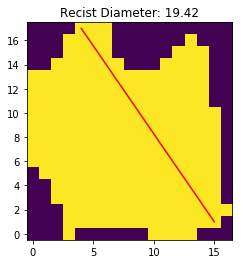

In [7]:
max_diam = recist_calc(points_array_test)